# Lab Two: Exploring Image Data

- https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

# 1. Business Understanding
- Malaria is a life-threatening disease spread to humans by mosquitoes, and is considered to be a severe public health issue. According to the World Health Organization, globally in 2022, there were an estimated 249 million malaria cases and 608,000 malaria deaths in 85 countries (source: https://www.who.int/news-room/fact-sheets/detail/malaria). The WHO African Region carries a disproportionate amount of the global malaria burden at 94% of malaria cases (233 million) and 95% (580,000) of malaria deaths. The infection caused by a parasite from the mosquito is preventable and curable. One method of preventing malaria is through thorough surveillance of it.

- The `Malaria Cell Images Dataset` contains over 27,000 images of cells that are labeled as either `parasitized` or `uninfected`. Each image will be converted to greyscale and resized to a 64x64 pixel image for data processing. The dataset was collected to improve the detection of malaria via image classification, in order to reduce the burden of malaria worldwide. According to the National Library of Medicine, existing drugs make malaria a curable disease, but inadequate diagnostics and emerging drug resistances are major barriers to successful mortality reduction. Therefore, the development of a fast and reliable diagnostic method is one of the most promising methods to fight malaria (source: https://lhncbc.nlm.nih.gov/LHC-research/LHC-projects/image-processing/malaria-project.html). 

- Accurate parasite counts are essential to diagnosing malaria correctly. However, performing microscopic diagnostics is not standardized in every region and depends on the skills and experience of the microscopist. In areas of lower resources, diagnostic quality can be negatively impacted, leading to incorrect diagnostics. In instances where false negative cases arise, this means unnecessary use of antibiotics, a second consultation, or even severe progression in malaria. In instances with false positive cases, a misdiagnosis means unnecessary use of anti-malaria treatments and resource depletion for those who might actually be suffering from malaria. The prediction algorithm for our case would need to be highly accurate, and avoid both false negatives and false positives altogether for it to be successful. We would measure the part of the success of our algorithm using metrics like `precision` and `recall`. High precision would ensure fewer false positives, while high recall ensures fewer false negatives. An `F1 score` that balances both metrics would provide a comprehensive assessment of the model's performance. It is impractical to believe that our prediction algorithm could reach 100% accuracy in classifying whether a cell is infected or not because some who may have been infected may not experience severe symptoms due to prior past infections or immunities. When considering our measure for a successful algorithm, we considered third parties that would be interested in the results.

- Accurate and precise malaria diagnostics would benefit `public health organizations`, `disease researchers`, and `hospitals`. Public health organizations, such as WHO, would benefit from our binary classification analysis because they can use our data to accurately diagnose someone with malaria, and provide appropriate treatment options to reduce the severity of the disease and prevent mortality. In areas that lack adequate and appropriate resources, having a tool that accurately and precisely detects malaria could save the lives of millions, especially in the WHO African Region. Due to its disproportionate amount of global malaria burden, the WHO African Region cannot afford to have false negatives or false positives, since that would deplete their malaria treatment resources without adequately addressing the issue. As a result, we want our prediction algorithm to achieve a `95-97%` accuracy in classifying whether a cell is infected with malaria or not. We also want to ensure the precision of our algorithm aligns with the accuracy in order to ensure we are not getting a disproportionate amount of false negatives and false positives, which we want to try to avoid. The target of 95-97% is based on the current state of diagnostic tools, such as EasyScan Go, where human microscopists typically achieve accuracy rates of around 85-90% (source: https://malariajournal.biomedcentral.com/articles/10.1186/s12936-022-04146-1). Achieving a 5-10% improvement from EasyScan Go is doable, as high quality smears and stainings are paramount in allowing a machine-learning algorithm to analyze infected cells, which is something EasyScan Go's current technology is unable to achieve at the moment. For example, incorporating noise reduction parameters can aid the screening tool in more accurately identifying and diagnosing an infected cell. 

- Another stakeholder that would appreciate our data are disease researchers. By studying the patterns that are exhibited from infected and uninfected cells, researchers can develop treatment plans that can aid in preventing or even treating the infections. According to WHO, partial resistance in antimalarial drugs has emerged in the WHO African Region (source: https://www.who.int/news-room/fact-sheets/detail/malaria). By being able to classify malaria cells accurately and precisely, and discovering patterns and trends of malaria, disease researchers can develop new antimalarial drugs that are less likely to develop resistance in those infected. The faster the diagnosis, the quicker the appropriate response, which can delay or prevent the onset of drug resistance.

- Lastly, hospitals can benefit from this screening tool as it can allocate appropriate resources to those who are infected or uninfected. By having a prediction algorithm of 95-97% accuracy and precision, hospitals can more confidently start treatment plans for those infected. If a false positive arises, the worst case is using malaria treatment on someone who does not need it. The only issue with this occurs when the hospital is in an area with limited supplies, or a public health emergency emerges. In this case, the accuracy and precision of our algorithm needs to be 97% and higher, in order to conserve as much resources as possible. However, in general, hospitals would benefit from this malaria screening tool because they can plan ahead for the resources they'll need by geographic location. 

- The prediction task for this dataset is a binary classification to detect whether a cell is parasitized or not with malaria, essentially developing an accurate and precise screening tool for malaria. Key stakeholders that would be interested in our results are public health organizations, disease researchers, and hospitals. This data is important because early and accurate detection of malaria can improve patient outcomes and reduce the burden of the disease. This data could also facilitate faster, more scalable diagnostics in essential regions where traditional microscopy is either too slow or resource-intensive. Achieving higher accuracy and precision with our algorithm would reduce the strain on healthcare workers and improve diagnostic precision in regions with limited medical expertise, ultimately to reduce the burden of malaria worldwide. Lastly, using metrics like precision and recall, and an F1 score can provide an assessment of our model's overall performance. This dataset can have important global implications, offering scalable solutions for regions that face sporadic and disproportionate malaria outbreaks. 

- Dataset: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria


# 2. Data Preparation

In [28]:
# Modules and Libraries
import os
import random
import time
from collections import Counter

# Numerical and data manipulation libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Machine learning and data processing libraries
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Interactive widgets and visualization libraries
from ipywidgets import widgets, interactive
import plotly
from plotly.graph_objs import Bar, Scatter, Layout
from plotly.graph_objs.layout import XAxis, YAxis

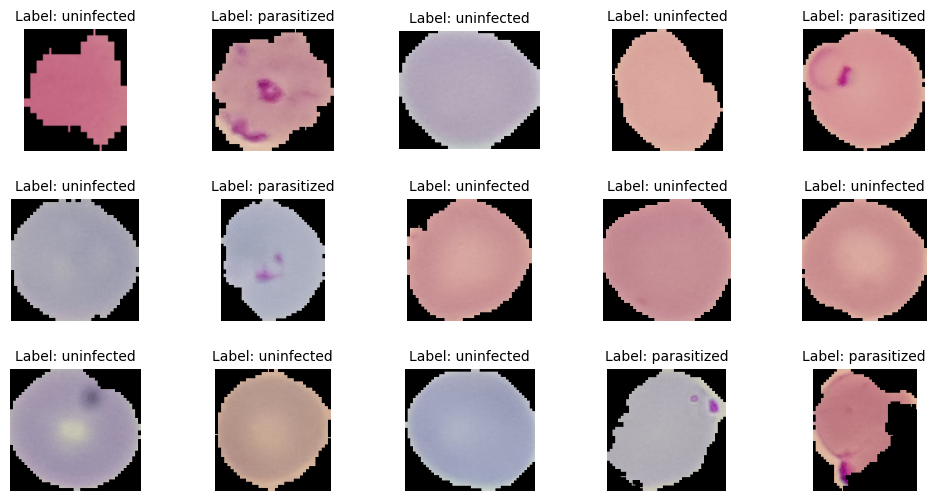

In [30]:
# Directory path
image_dir = '/Users/salissa/Desktop/ML/Labs/Lab Two/cell_images'

# Lists to store original imgs & labels
original_images = []
original_labels = []

# Iterating through subdirectories to load images
for category in ['parasitized', 'uninfected']:
    category_dir = os.path.join(image_dir, category)
    image_files = [f for f in os.listdir(category_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for img_file in image_files:
        img_path = os.path.join(category_dir, img_file)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Failed to load image: {img_path}")
            continue

        # Stores the original image and label for images
        original_images.append(img)  
        original_labels.append(category)  

# Displaying 15 random original images
num_images_to_show = 15
rows, cols = 3, 5
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

indices = random.sample(range(len(original_images)), num_images_to_show)
selected_images = [original_images[i] for i in indices]
selected_labels = [original_labels[i] for i in indices]

for i in range(num_images_to_show):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(cv2.cvtColor(selected_images[i], cv2.COLOR_BGR2RGB))  # Converting BGR to RGB for display
    plt.axis('off')
    plt.title(f"Label: {selected_labels[i]}", fontsize=10)

# display
plt.show()

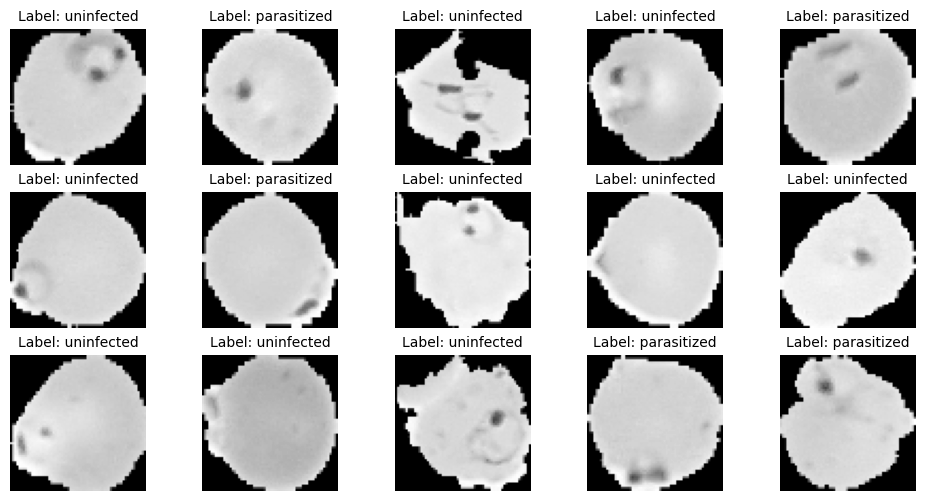

In [31]:
# Lists to store processed imgs and labels
images = [] 
labels = []

# Iterating through subdirectories to process imgs
for category in ['parasitized', 'uninfected']:
    category_dir = os.path.join(image_dir, category)
    image_files = [f for f in os.listdir(category_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for img_file in image_files:
        img_path = os.path.join(category_dir, img_file)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Failed to load image: {img_path}")
            continue
        
        # Resizing and converting to grayscale
        img_resized = cv2.resize(img, (64, 64))
        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

        # Stores the processed image and label for image
        images.append(img_gray)  
        labels.append(category)  

# Display 15 random processed grayscale images
plt.figure(figsize=(12, 6))

for i in range(num_images_to_show):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray') 
    plt.axis('off')  # Hide axes
    plt.title(f"Label: {selected_labels[i]}", fontsize=10) 

# display
plt.show()

In [34]:
# Converting list of imgs to numpy array
images_np = np.array(images)
print(f"Shape of images_np: {images_np.shape}")

Shape of images_np: (27558, 64, 64)


In [36]:
# Linearizing the images, flatten each image into a 1-D array
# unpacking 3D shape to later reshape
n_images, height, width = images_np.shape

# Converting 2D image into 1D arr & Normalizing the pixels in range [0, 1]
images_flattened = images_np.reshape(n_images, height * width) / 255.0 

# display info about flattened images
print(f"Number of images: {n_images}")
print(f"Flattened image shape: {images_flattened.shape}")

Number of images: 27558
Flattened image shape: (27558, 4096)


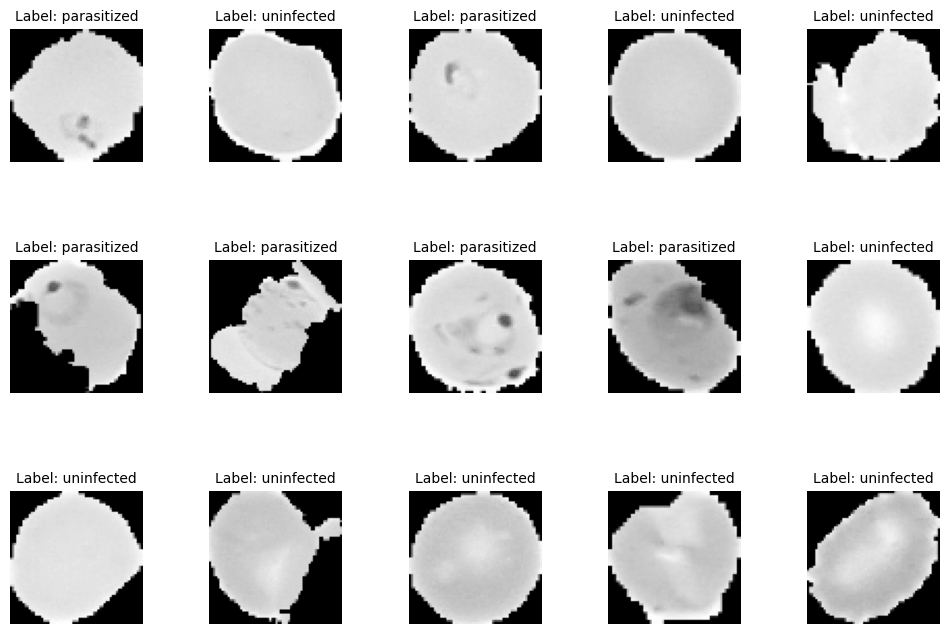

In [40]:
# Visualizing Several Images
# shuffling images and labels together
images_np, labels = shuffle(images_np, labels, random_state=42)

# visualize 15 random imgs 3x5 grid
num_images_to_show = 15
plt.figure(figsize=(12, 8))
rows, cols = 3, 5

for i in range(num_images_to_show):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images_np[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {labels[i]}", fontsize=10)
    
# Adding space, display
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [42]:
# Counting occurrences of each label
label_counts = Counter(labels)
print(f"Number of parasitized images: {label_counts['parasitized']}")
print(f"Number of uninfected images: {label_counts['uninfected']}")

Number of parasitized images: 13779
Number of uninfected images: 13779


# 3. Data Reduction (6 points total)
- [.5 points] Perform linear dimensionality reduction of the images using principal components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.


In [44]:
# Function to plot the explained variance
def plot_explained_variance(pca):
    plotly.offline.init_notebook_mode()

    # extract explained variance ratio and cumulative variance
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)

    # plot individual and cumulative explained variance
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(
            xaxis=XAxis(title='Principal components'), 
            yaxis=YAxis(title='Explained variance ratio')
        )
    })

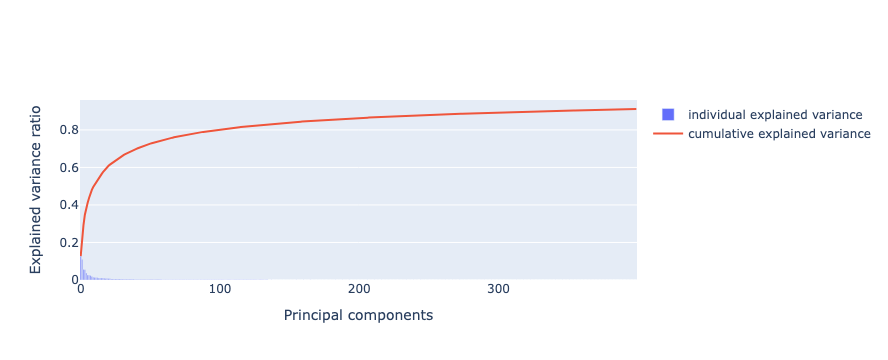

In [46]:
# Performing Linear Dimensionality Reduction Using PCA
# number of components to keep
n_components = 400
pca = PCA(n_components=n_components)

# fit PCA of flattened img data, copy to not alter original
X_pca = pca.fit(images_flattened.copy()) 

# plot explained variance 
plot_explained_variance(pca)

# display
plt.show()

In [56]:
# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# variance thresholds to check
thresholds = [0.85, 0.90, 0.95]

# dictionary
components_for_thresholds = {}

# Iterate through cumulative explained variance to find the number of components for each threshold
for i, cumulative in enumerate(cumulative_variance):
    for threshold in thresholds[:]:
        if cumulative >= threshold: 
            components_for_thresholds[threshold] = i + 1
            print(f"Number of components for {int(threshold * 100)}% variance: {components_for_thresholds[threshold]}")
            
            # removes satified threshold avoids rechecking
            thresholds.remove(threshold)

Number of components for 85% variance: 172
Number of components for 90% variance: 336


In [11]:
# Get the individual explained variance (variance for each component)
individual_explained_variance = pca.explained_variance_ratio_

# Print the individual explained variance for each component
print("Individual explained variance for each component:")
for i, var in enumerate(individual_explained_variance):
    print(f"Component {i+1}: {var:.5f}")

Individual explained variance for each component:
Component 1: 0.12736
Component 2: 0.10900
Component 3: 0.05632
Component 4: 0.05523
Component 5: 0.03711
Component 6: 0.02693
Component 7: 0.02486
Component 8: 0.02445
Component 9: 0.01892
Component 10: 0.01515
Component 11: 0.01281
Component 12: 0.01234
Component 13: 0.01215
Component 14: 0.01065
Component 15: 0.01060
Component 16: 0.01055
Component 17: 0.01021
Component 18: 0.00998
Component 19: 0.00828
Component 20: 0.00815
Component 21: 0.00764
Component 22: 0.00601
Component 23: 0.00569
Component 24: 0.00560
Component 25: 0.00557
Component 26: 0.00544
Component 27: 0.00530
Component 28: 0.00524
Component 29: 0.00518
Component 30: 0.00478
Component 31: 0.00450
Component 32: 0.00441
Component 33: 0.00413
Component 34: 0.00408
Component 35: 0.00382
Component 36: 0.00373
Component 37: 0.00354
Component 38: 0.00350
Component 39: 0.00347
Component 40: 0.00330
Component 41: 0.00327
Component 42: 0.00321
Component 43: 0.00316
Component 44:

## PCA Analysis:

### Individual Explained Variance
- The first principal component accounts for 12.74% of the total variance, while the second component accounts for 10.90%. After the initial components, diminishing returns occur as seen in components 6 to 10, where each explain less than 3% of the variance. This pattern s typical in PCA where the first few components capture the most significant variance and subsequent components contribute progressively less.

### Dimensions Required
- Despite the diminishing returns after the first few components, we chose to retain 400 principal components for the following reasons:
    - 1) To cover 90% of the variance, 336 principal components are required. We opted for 400 components to ensure a more comprehensive representation of the dataset. This ensures that the dataset is well-represented, preserving as much information as possible, which is crucial for an accurate classification of the cell images. 
    - 2) Since we are working on classifying whether a cell image is infected or not, maintaining a high level of variance is essential to minimize false positives and negatives. Retaining 400 components, allows us to capture more detailed patterns in the data potentially improving the performance of our classification model. 
    - 3) If we were satisfied with 85% variance, we would require 172 dimensions, nearly half of what is required for 90%. However given the importance of retaining variance for detecting infections, we chose to cover 90% of the variance. This trade-off reflects a balance between dimensionality reduction and preserving the nuances in the data.

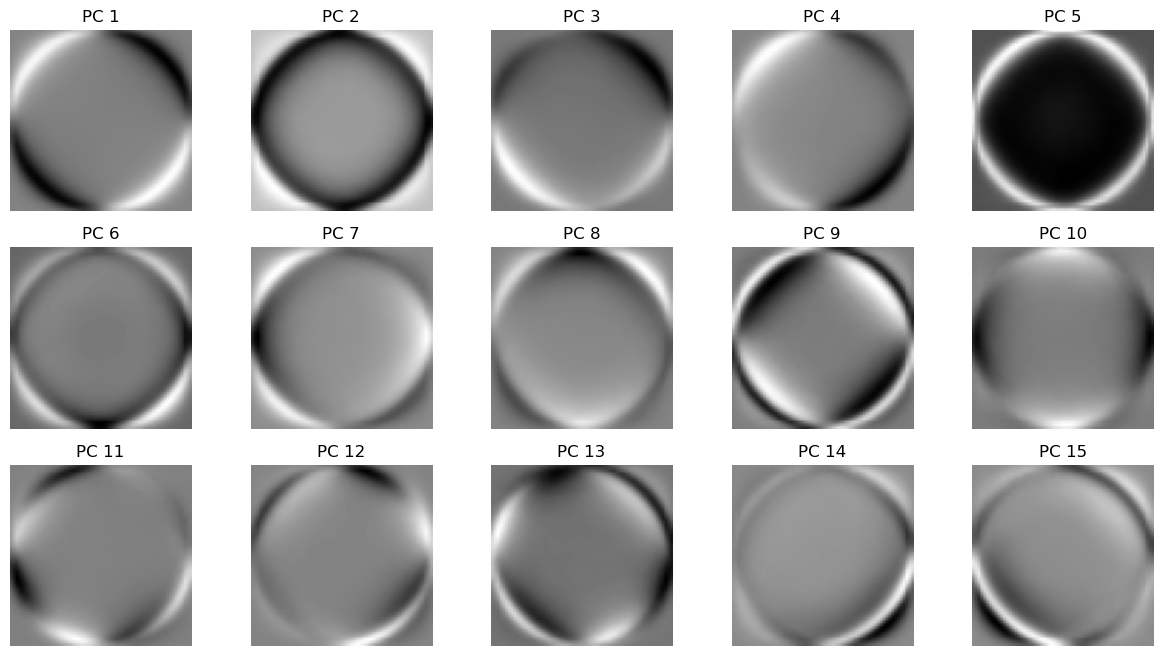

In [62]:
# Getting the principal components (eigenfaces)
eigenfaces = pca.components_.reshape((n_components, 64, 64))

# Visualizing first 15 principal components (eigenfaces)
plt.figure(figsize=(15, 8))

# Display the first 15 eigenfaces
for i in range(num_images_to_show):  
    plt.subplot(3, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f"PC {i+1}")
    plt.axis('off')

#display
plt.show()

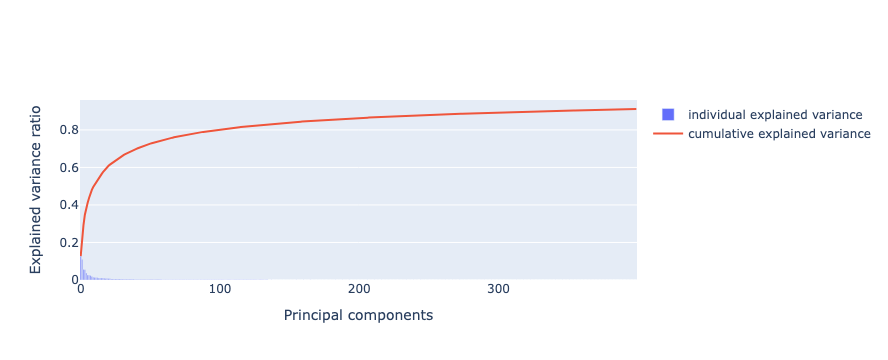

In [64]:
# Visualize explained variance
plot_explained_variance(pca)

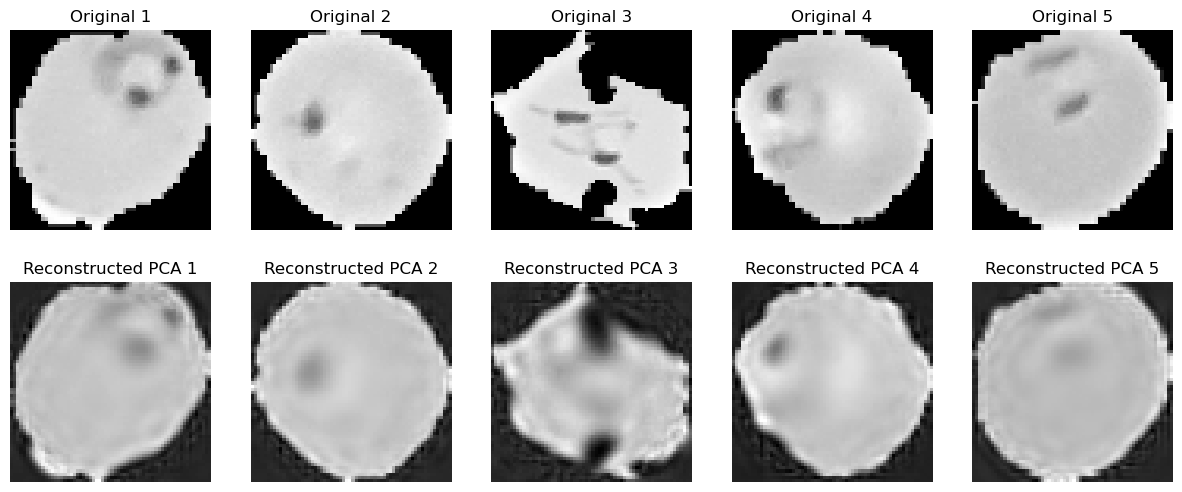

In [86]:
def reconstruct_image(trans_obj,org_features):
    # project original image lower dimensional
    low_rep = trans_obj.transform(org_features)

    # reconstruct image 
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image

# examples to visualize
num_examples = 5

# plot original and reconstructed images
plt.figure(figsize=(15,6))

for i in range(num_examples):
    # index of image to reconstruct
    idx_to_reconstruct = i    
    X_idx = images_flattened[idx_to_reconstruct]

    # get low dimensional representation and reconstruct
    low_dimensional_representation, reconstructed_image = reconstruct_image(pca, X_idx.reshape(1, -1))

    # original image
    plt.subplot(2, num_examples, i + 1)
    plt.imshow(X_idx.reshape((64, 64)), cmap=plt.cm.gray)
    plt.title(f'Original {i+1}')
    plt.axis('off')
    
    # reconstruct image from PCA
    plt.subplot(2, num_examples, i + 1 + num_examples)
    plt.imshow(reconstructed_image.reshape((64,64)), cmap=plt.cm.gray)
    plt.title(f'Reconstructed PCA {i+1}')
    plt.axis('off')

# display
#plt.tight_layout()
plt.show()

## Original vs Reconstructed from Full PCA
- The reconstruction from Full PCA demonstrates that the original image is fairly well preserved, with key features such as the shape of the cell and some finer details still recognizable. This confirms that PCA can serve as a meaningful tool for dimensionality reduction while maintaining the integrity of the original data.

- In our case, we chose to retain 400 principal components, which captures 90% of the variance in the dataset. This decision was made to ensure that we are accounting for both the major structural elements and more subtle patterns present in the cell images. By capturing this amount of variance, we strike a balance between dimensionality reduction and retaining sufficient detail, which is critical for the accuracy of subsequent analysis or classification tasks.

## [.5 points]
- Perform linear dimensionality reduction of your image data using randomized principle components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.


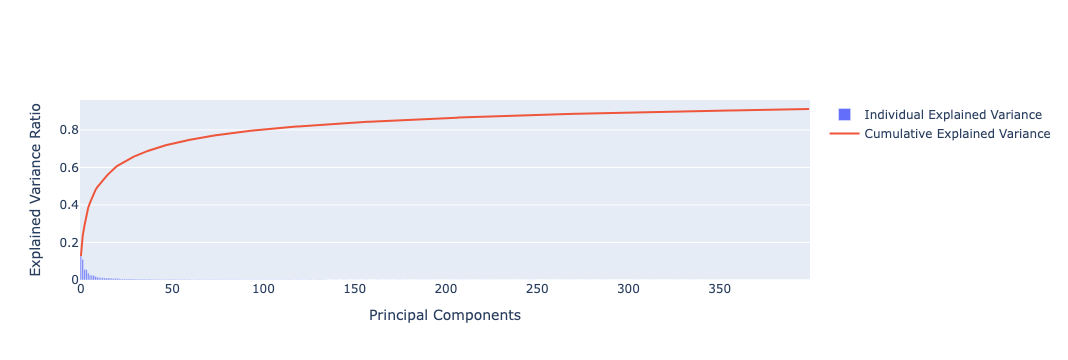

In [96]:
# Performing Linear Dimensionality Reduction Using Randomized PCA
rpca = PCA(n_components=n_components, svd_solver='randomized')
X_pca = rpca.fit(images_flattened.copy())

# Function to plot the explained variance
def plot_explained_variance(rpca):
    explained_var = rpca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)

    # plot individual and explained variance
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='Individual Explained Variance'),
                 Scatter(y=cum_var_exp, name='Cumulative Explained Variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal Components'), yaxis=YAxis(title='Explained Variance Ratio'))
    })
    
# call function to plot  
plot_explained_variance(rpca)

In [112]:
# Compute cumulative explained variance
rpca = PCA(n_components=800, svd_solver='randomized')
X_pca = rpca.fit(images_flattened.copy()) 

cumulative_variance = np.cumsum(rpca.explained_variance_ratio_)

# Initialize variables to store the number of components for 85%, 90%, and 95% variance
components_85 = None
components_90 = None
components_95 = None

# Iterate through cumulative explained variance to find the number of components for each threshold
for i, cumulative in enumerate(cumulative_variance):
    if cumulative >= 0.85 and components_85 is None:
        components_85 = i + 1
        print(f"Number of components for 85% variance: {components_85}")
    
    if cumulative >= 0.90 and components_90 is None:
        components_90 = i + 1
        print(f"Number of components for 90% variance: {components_90}")

    if cumulative >= 0.95 and components_95 is None:
        components_95 = i + 1
        print(f"Number of components for 95% variance: {components_95}")

    # break the loop once all thresholds are met
    if components_85 and components_90 and components_95:
        break

Number of components for 85% variance: 172
Number of components for 90% variance: 336
Number of components for 95% variance: 751


In [18]:
# Get the individual explained variance (variance for each component)
individual_explained_variance = rpca.explained_variance_ratio_

# Print the individual explained variance for each component
print("Individual explained variance for each component:")
for i, var in enumerate(individual_explained_variance):
    print(f"Component {i+1}: {var:.5f}")

Individual explained variance for each component:
Component 1: 0.12736
Component 2: 0.10900
Component 3: 0.05632
Component 4: 0.05523
Component 5: 0.03711
Component 6: 0.02693
Component 7: 0.02486
Component 8: 0.02445
Component 9: 0.01892
Component 10: 0.01515
Component 11: 0.01281
Component 12: 0.01234
Component 13: 0.01215
Component 14: 0.01065
Component 15: 0.01060
Component 16: 0.01055
Component 17: 0.01021
Component 18: 0.00998
Component 19: 0.00828
Component 20: 0.00815
Component 21: 0.00764
Component 22: 0.00601
Component 23: 0.00569
Component 24: 0.00560
Component 25: 0.00557
Component 26: 0.00544
Component 27: 0.00530
Component 28: 0.00524
Component 29: 0.00518
Component 30: 0.00478
Component 31: 0.00450
Component 32: 0.00441
Component 33: 0.00413
Component 34: 0.00408
Component 35: 0.00382
Component 36: 0.00373
Component 37: 0.00354
Component 38: 0.00350
Component 39: 0.00347
Component 40: 0.00330
Component 41: 0.00327
Component 42: 0.00321
Component 43: 0.00316
Component 44:

# ** !!!!!!!!!!!!!!!!!!!!!!!!!!!!! MAYBE NEEDS MORE DESCRIPTION?? !!!!!!!!!!!!!!!!!!!!!!!!!**
## Analysis for Randomized PCA 

### Individual Explained Variance
- The individual explained variance for component one accounts for 12.74% of the variance, and component 2 accounts for 10.90%. We receive similar results that we did with full PCA. This is expected as both methods are designed to identify the leading components efficiently. It experiences the same trends as the PCA in terms of decreasing explained variance as the number of components increases. 

### Dimensions Required
- Similar to full PCA, we kept 400 dimensions, as this number reflects the 90% of variance we are aiming for in our classification model. Due to the similarities with PCA, randomized PCA reflects similar approximations in the amount of dimensions needed to reach 90% variance. The cumulative explained variance displays this threshold above.

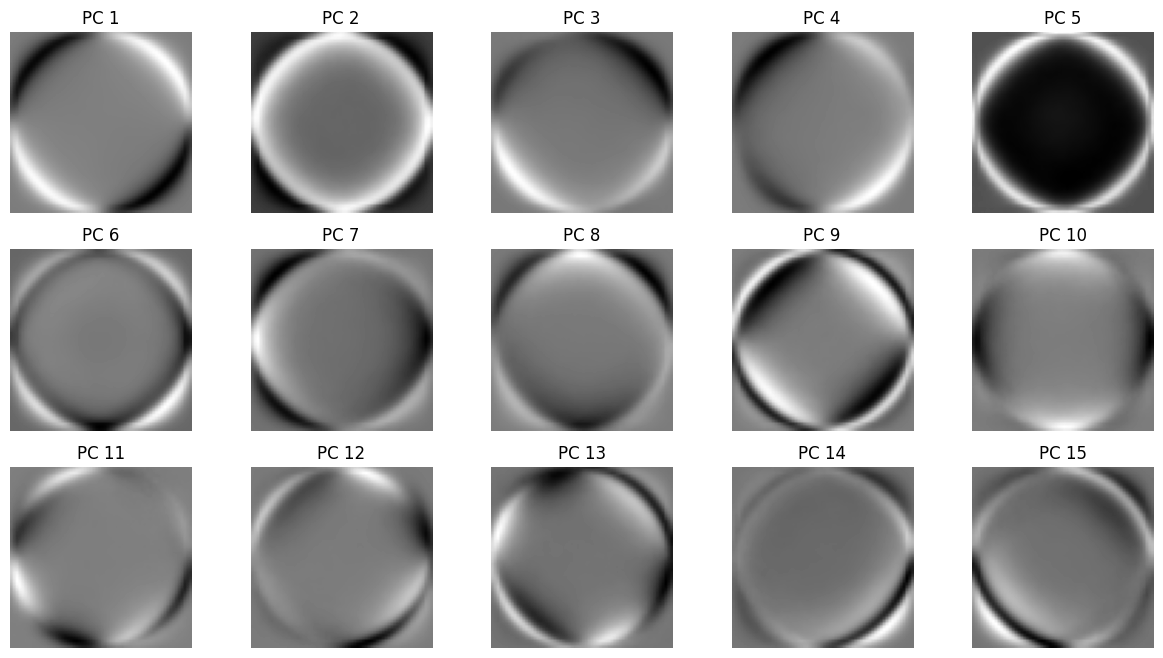

In [19]:
# Getting the principal components (eigenfaces)
eigenfaces = rpca.components_.reshape((n_components, 64, 64))

# Visualizing a few of the top principal components (eigenfaces)
plt.figure(figsize=(15, 8))
for i in range(15):  # Display the first 15 eigenfaces
    plt.subplot(3, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f"PC {i+1}")
    plt.axis('off')
plt.show()

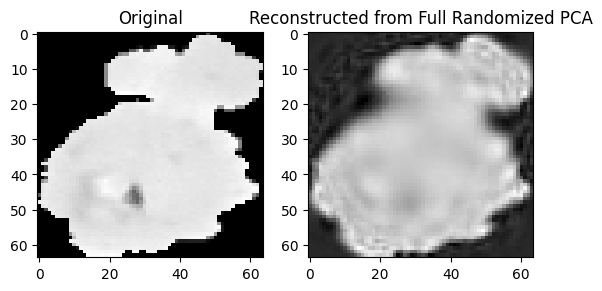

In [20]:
def reconstruct_image(trans_obj, org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image

idx_to_reconstruct = 1    
X_idx = images_flattened[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(rpca, X_idx.reshape(1, -1))

plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((64, 64)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid(False)
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((64,64)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full Randomized PCA')
plt.grid(False)
plt.show()

### Original vs Reconstructed from Randomized PCA
- As shown above, randomized PCA reconstructs our original image fairly accurately as well, being able to identify the shape of the cell and a few details, allowing us to use it as a meaningful measurement of comparison. Similar to full PCA, we chose to use 400 components/dimensions because we wanted to capture 90% of the variance in order to capture minor details and patterns that are present in our cell images. 

- [2 points]  Compare the representation using PCA and Randomized PCA. The method you choose to compare dimensionality methods should quantitatively explain which method is better at representing the images with fewer components.  Do you prefer one method over another? Why?


In [21]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images_flattened, labels, test_size=0.3, random_state=42)

# PCA with full solver
n_components = 400  # Or the number of components that capture 90% variance
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Randomized PCA (same n_components)
rpca = PCA(n_components=n_components, svd_solver='randomized', random_state=42)
X_train_rpca = rpca.fit_transform(X_train)
X_test_rpca = rpca.transform(X_test)

In [22]:
# Initialize KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train on PCA-reduced data
knn.fit(X_train_pca, y_train)
y_pred_pca = knn.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f'Accuracy using Full PCA: {accuracy_pca:.4f}')

# Train on Randomized PCA-reduced data
knn.fit(X_train_rpca, y_train)
y_pred_rpca = knn.predict(X_test_rpca)
accuracy_rpca = accuracy_score(y_test, y_pred_rpca)
print(f'Accuracy using Randomized PCA: {accuracy_rpca:.4f}')


Accuracy using Full PCA: 0.5110
Accuracy using Randomized PCA: 0.5102


In [23]:
# Timing Full PCA
start_time = time.time()
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(images_flattened.copy())
end_time = time.time()

pca_time = end_time - start_time
print(f"Time taken for Full PCA: {pca_time:.5f} seconds")

Time taken for Full PCA: 50.24673 seconds


In [24]:
start_time = time.time()
rpca = PCA(n_components=n_components, svd_solver='randomized')
X_rpca = rpca.fit_transform(images_flattened.copy())
end_time = time.time()

rpca_time = end_time - start_time
print(f"Time taken for Randomized PCA: {rpca_time:.5f} seconds")


Time taken for Randomized PCA: 54.51793 seconds


# ** !!!!!!!!!!!!!!!!!!!!!!!!!!!! NEEDS ANALYSIS FROM THE COMPARISON !!!!!!!!!!!!!!!!!!!!!!!!!! **

In [25]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!! I LIKE THE WIDGET. NOT SURE TO KEEP OR NOT, BUT WILL NEED TO EDIT / REFINE AS WELL !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Perform PCA
pca = PCA(n_components=400)
pca.fit(images_flattened)

# Perform Randomized PCA
rpca = PCA(n_components=400, svd_solver='randomized')
rpca.fit(images_flattened)

def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct).astype(int)
    
    x_flat = images_flattened[idx_to_reconstruct].reshape(1, -1)
    
    # Reconstruct images
    reconstructed_image = pca.inverse_transform(pca.transform(x_flat.copy()))
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(x_flat.copy()))
    
    # Plotting
    plt.figure(figsize=(15, 7))
    
    plt.subplot(1, 3, 1)  # Original
    plt.imshow(x_flat.reshape((64, 64)), cmap=plt.cm.gray)
    plt.title('Original')
    plt.grid(False)
    
    plt.subplot(1, 3, 2)  # PCA
    plt.imshow(reconstructed_image.reshape((64, 64)), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid(False)
    
    plt.subplot(1, 3, 3)  # Randomized PCA
    plt.imshow(reconstructed_image_rpca.reshape((64, 64)), cmap=plt.cm.gray)
    plt.title('Randomized PCA')
    plt.grid(False)
    
    plt.show()

# Interactive widget to choose the index of the image to reconstruct
interactive_plot = interactive(plt_reconstruct, idx_to_reconstruct=(0, len(images_flattened)-1, 1))
display(interactive_plot)

interactive(children=(IntSlider(value=13778, description='idx_to_reconstruct', max=27557), Output()), _dom_cla…


- [1 points] Perform feature extraction upon the images using any feature extraction technique (e.g., gabor filters, ordered gradients, DAISY, etc.).



- [2 points] Does this feature extraction method show promise for your prediction task? Why? Use visualizations to analyze this questions. For example, visualize the differences between statistics of extracted features in each target class. Another option, use a heat map of the pairwise differences (ordered by class) among all extracted features. Another option, build a nearest neighbor classifier to see actual classification performance.  